<a href="https://www.kaggle.com/naheenmohammadkadir/titanic-dataset?scriptVersionId=88503283" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
#read files
#Reading train file:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
#Reading test file:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
ID_train = train.PassengerId
ID_test = test.PassengerId

train = train.drop(['PassengerId','Cabin','Ticket'],axis=1)
test = test.drop(['PassengerId','Cabin','Ticket'],axis=1)

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [7]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [8]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

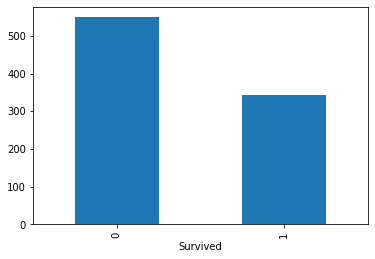

In [10]:
train.groupby("Survived").Survived.count().plot.bar()
plt.show()

In [11]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
train.Age = train.Age.astype(int)
train.Fare = train.Fare.astype(int)

test.Age = test.Age.astype(int)
test.Fare = test.Fare.astype(int)

In [13]:
train.dtypes

Survived     int64
Pclass       int64
Name        object
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked    object
dtype: object

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S


In [15]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [16]:
title = train.groupby('Title')['Survived'].sum().reset_index()
title

,Title,Survived
0,Capt,0
1,Col,1
2,Don,0
3,Dr,3
4,Jonkheer,0
5,Lady,1
6,Major,1
7,Master,23
8,Miss,127
9,Mlle,2


In [17]:
title1 ={'Capt':1,'Col':2,'Don':3,'Dr':4,'Jonkheer':5,'Lady':6,'Major':7,
        'Master':8,'Miss':9,'Mlle':10,'Mme':11,'Mr':12,'Mrs':13,'Ms':14,
        'Rev':15,'Sir':16,'the Countess':17,'Dona':18}
train.Title = train.Title.map(title1)
test.Title = test.Title.map(title1)

In [18]:
title2 = train.groupby('Title')['Survived'].sum().reset_index()
title2

,Title,Survived
0,1,0
1,2,1
2,3,0
3,4,3
4,5,0
5,6,1
6,7,1
7,8,23
8,9,127
9,10,2


In [19]:
sex = train.groupby('Sex')['Survived'].sum().reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


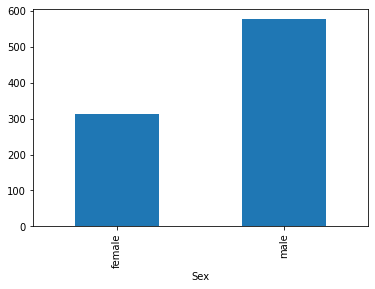

In [20]:
train.groupby('Sex').Survived.count().plot.bar()
plt.show()

In [21]:
sex1 = {'male':1, 'female':2}
train.Sex = train.Sex.map(sex1)
test.Sex = test.Sex.map(sex1)

In [22]:
sex2 = train.groupby('Sex')['Survived'].sum().reset_index()
sex2

,Sex,Survived
0,1,109
1,2,233


In [23]:
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch
train.Family.sum(), test.Family.sum()

(806, 351)

In [24]:
embark = train.groupby("Embarked")["Survived"].sum().reset_index()
embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,219


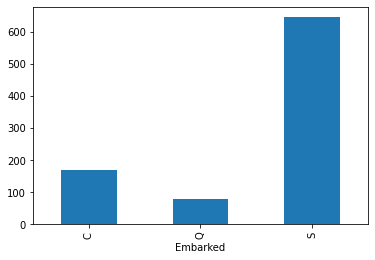

In [25]:
train.groupby("Embarked").Survived.count().plot.bar()
plt.show()

In [26]:
letters = train.Embarked
numbers = []
for letter in letters:
    number = ord(letter)
    numbers.append(number)

print(numbers)

train.Embarked = numbers
train.Embarked

[83, 67, 83, 83, 83, 81, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 81, 83, 83, 83, 67, 83, 81, 83, 67, 67, 81, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 67, 81, 83, 81, 81, 67, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 67, 83, 83, 67, 83, 81, 83, 67, 83, 83, 83, 67, 83, 83, 67, 81, 83, 67, 83, 67, 83, 83, 83, 83, 67, 83, 83, 83, 67, 67, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 67, 83, 83, 83, 67, 83, 83, 83, 83, 81, 83, 81, 83, 83, 83, 83, 83, 67, 67, 81, 83, 81, 83, 83, 83, 83, 67, 83, 83, 83, 67, 81, 67, 83, 83, 83, 83, 81, 67, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 67, 81, 83, 83, 83, 83,

0      83
1      67
2      83
3      83
4      83
       ..
886    83
887    83
888    83
889    67
890    81
Name: Embarked, Length: 891, dtype: int64

In [27]:
letters = test.Embarked
numbers = []
for letter in letters:
    number = ord(letter)
    numbers.append(number)
print(numbers)
test.Embarked = numbers
test.Embarked

[81, 83, 81, 83, 83, 83, 81, 83, 67, 83, 83, 83, 83, 83, 83, 67, 81, 67, 83, 67, 67, 83, 83, 67, 67, 83, 67, 67, 83, 67, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 67, 81, 67, 83, 83, 67, 83, 83, 67, 81, 83, 83, 83, 67, 83, 83, 83, 81, 67, 83, 81, 83, 67, 83, 81, 83, 83, 67, 67, 67, 83, 83, 83, 81, 67, 83, 83, 83, 81, 67, 81, 83, 81, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 67, 83, 81, 83, 67, 83, 81, 81, 83, 83, 67, 81, 67, 81, 83, 67, 67, 83, 67, 83, 83, 81, 67, 83, 81, 83, 83, 81, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 67, 83, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 67, 83, 83, 83, 67, 83, 67, 83, 67, 83, 81, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 83, 81, 83, 67, 83, 83, 67, 81, 83, 67, 83, 83, 83, 83, 83, 83, 83, 81, 83, 67, 83, 67, 83, 83, 83, 67, 67, 83, 81, 83, 83, 83, 83, 83, 81, 67, 83, 67, 67, 83, 67, 67, 83, 67, 83, 83, 83, 83, 83, 83, 67,

0      81
1      83
2      81
3      83
4      83
       ..
413    83
414    67
415    83
416    83
417    67
Name: Embarked, Length: 418, dtype: int64

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7,83,12,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,71,67,13,1
2,1,3,"Heikkinen, Miss. Laina",2,26,0,0,7,83,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,53,83,13,1
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8,83,12,0


In [29]:
y = train["Survived"]
features = ["Pclass","Sex","Family","Embarked","Title","Age","Fare"]
X = train[features]

X_test = test[features]

In [30]:
X

,Pclass,Sex,Family,Embarked,Title,Age,Fare
0,3,1,1,83,12,22,7
1,1,2,1,67,13,38,71
2,3,2,0,83,9,26,7
3,1,2,1,83,13,35,53
4,3,1,0,83,12,35,8
...,...,...,...,...,...,...,...
886,2,1,0,83,15,27,13
887,1,2,0,83,9,19,30
888,3,2,3,83,9,28,23
889,1,1,0,67,12,26,30


In [31]:
X_test

,Pclass,Sex,Family,Embarked,Title,Age,Fare
0,3,1,0,81,12,34,7
1,3,2,1,83,13,47,7
2,2,1,0,81,12,62,9
3,3,1,0,83,12,27,8
4,3,2,2,83,13,22,12
...,...,...,...,...,...,...,...
413,3,1,0,83,12,27,8
414,1,2,0,67,18,39,108
415,3,1,0,83,12,38,7
416,3,1,0,83,12,27,8


In [32]:
#split train set for testing

rows = 800
X_train = X[:rows]
X_val = X[rows:]

y_train = y[:rows]
y_val = y[rows:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((800, 7), (91, 7), (800,), (91,), (418, 7))

Logistic Regression

//////

In [33]:
class LogisticReg:
    def __init__(self, lr=0.001,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self, X, y):
        #init parameters
        n_samples, n_features = X.shape #X=m*n (m n_samples + n n_features)
        self.weights = np.zeros(n_features)#n*1
        self.bias = 0
        
        #grad
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.__sigmoid(linear_model) #m*1
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db = (1/n_samples) * np.sum(y_predicted-y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.__sigmoid(linear_model) #m*1
        
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

In [34]:
def acc(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc*100

In [35]:
reg = LogisticReg(lr=5e-5, n_iters=200000)

In [36]:
reg.fit(X_train, y_train)
pred = reg.predict(X_val)

In [37]:
print("LR classification accuracy:",acc(y_val,pred))

LR classification accuracy: 75.82417582417582


In [38]:
prediction = reg.predict(X_test)

In [39]:
prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [40]:
output = pd.DataFrame({'PassengerId':ID_test, 'Survived':prediction})
output.to_csv('F:\study materials\data\\titanic\\submission.csv', index=False)
print("Successful!!")

Successful!!


In [41]:
my_sub = pd.read_csv('F:\study materials\data\\titanic\\submission.csv')
my_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
